f10.7cm radio flux

### **Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [3]:
data=pd.read_csv("C:/Users/subha/OneDrive/Desktop/Project/data/f10.7cm_radio_flux_data.csv")
data=pd.DataFrame(data)

### **Printing the first 5 rows**

In [4]:
data.head()

,yy,mm,dd,F10.7
0,1957,10,1,269.8
1,1957,10,2,253.6
2,1957,10,3,266.4
3,1957,10,4,238.2
4,1957,10,5,246.0


In [5]:
data.tail()

,yy,mm,dd,F10.7
23968,2023,5,16,137.3
23969,2023,5,17,141.0
23970,2023,5,18,154.1
23971,2023,5,19,168.5
23972,2023,5,20,173.7


### **Checking the number of rows and columns**

In [6]:
data.shape

(23973, 4)

### **Printing the columns names**

In [7]:
data.columns

Index(['yy', 'mm', 'dd', 'F10.7'], dtype='object')

### **Check for null value**

In [8]:
data.isnull().sum()

yy       0
mm       0
dd       0
F10.7    0
dtype: int64

### **Plotting the bar chart to respective features**

## **5 Point Summary**

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yy,23973.0,1990.066074,18.950857,1957.0,1974.0,1990.0,2006.0,2023.0
mm,23973.0,6.518750,3.456536,1.0,4.0,7.0,10.0,12.0
dd,23973.0,15.724523,8.799130,1.0,8.0,16.0,23.0,31.0
F10.7,23973.0,120.981684,52.042637,52.5,77.0,104.8,151.4,924.4


### **Checking of Duplicate Records**

In [10]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(data[dups])

False
Empty DataFrame
Columns: [yy, mm, dd, F10.7]
Index: []


In [11]:
cols=["yy","mm","dd"]
data['date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [12]:
data.head()

,yy,mm,dd,F10.7,date
0,1957,10,1,269.8,1957-10-1
1,1957,10,2,253.6,1957-10-2
2,1957,10,3,266.4,1957-10-3
3,1957,10,4,238.2,1957-10-4
4,1957,10,5,246.0,1957-10-5


In [13]:
data['date']=pd.to_datetime(data['date'])

In [14]:
data.head()

,yy,mm,dd,F10.7,date
0,1957,10,1,269.8,1957-10-01
1,1957,10,2,253.6,1957-10-02
2,1957,10,3,266.4,1957-10-03
3,1957,10,4,238.2,1957-10-04
4,1957,10,5,246.0,1957-10-05


In [15]:
data.tail()

,yy,mm,dd,F10.7,date
23968,2023,5,16,137.3,2023-05-16
23969,2023,5,17,141.0,2023-05-17
23970,2023,5,18,154.1,2023-05-18
23971,2023,5,19,168.5,2023-05-19
23972,2023,5,20,173.7,2023-05-20


In [16]:
data=data.drop(['yy','mm','dd'], axis=1)

In [17]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


In [18]:
data.head()

,F10.7
date,
1957-10-01,269.8
1957-10-02,253.6
1957-10-03,266.4
1957-10-04,238.2
1957-10-05,246.0


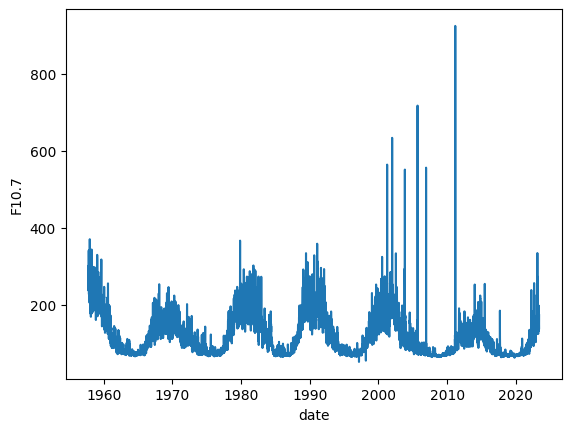

In [19]:
plt.xlabel('date')
plt.ylabel('F10.7')
plt.plot(data)

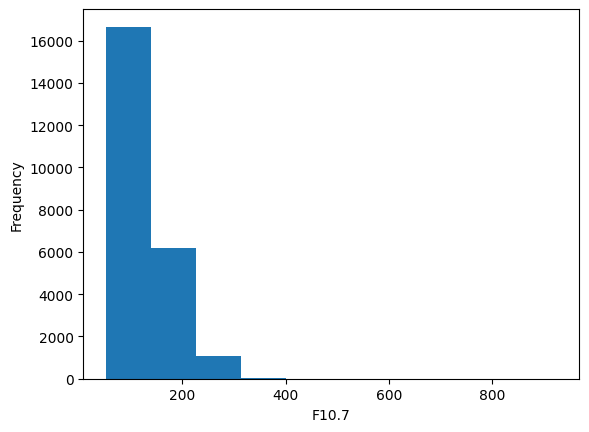

In [20]:
plt.hist(data['F10.7'], bins=10)
plt.xlabel('F10.7')
plt.ylabel('Frequency')
plt.show()

### **Plotting the pairplot for the set of attributes**

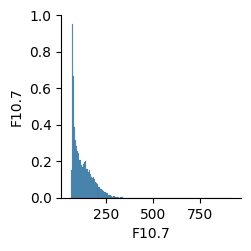

In [21]:
sns.pairplot(data)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['F10.7'] = scaler.fit_transform(data[['F10.7']])


In [23]:
data.head()

,F10.7
date,
1957-10-01,2.859606
1957-10-02,2.548316
1957-10-03,2.794273
1957-10-04,2.252399
1957-10-05,2.402279


In [24]:
from sklearn.model_selection import TimeSeriesSplit
tss=TimeSeriesSplit(n_splits=8, test_size=24*27, gap=24)
data=data.sort_index()

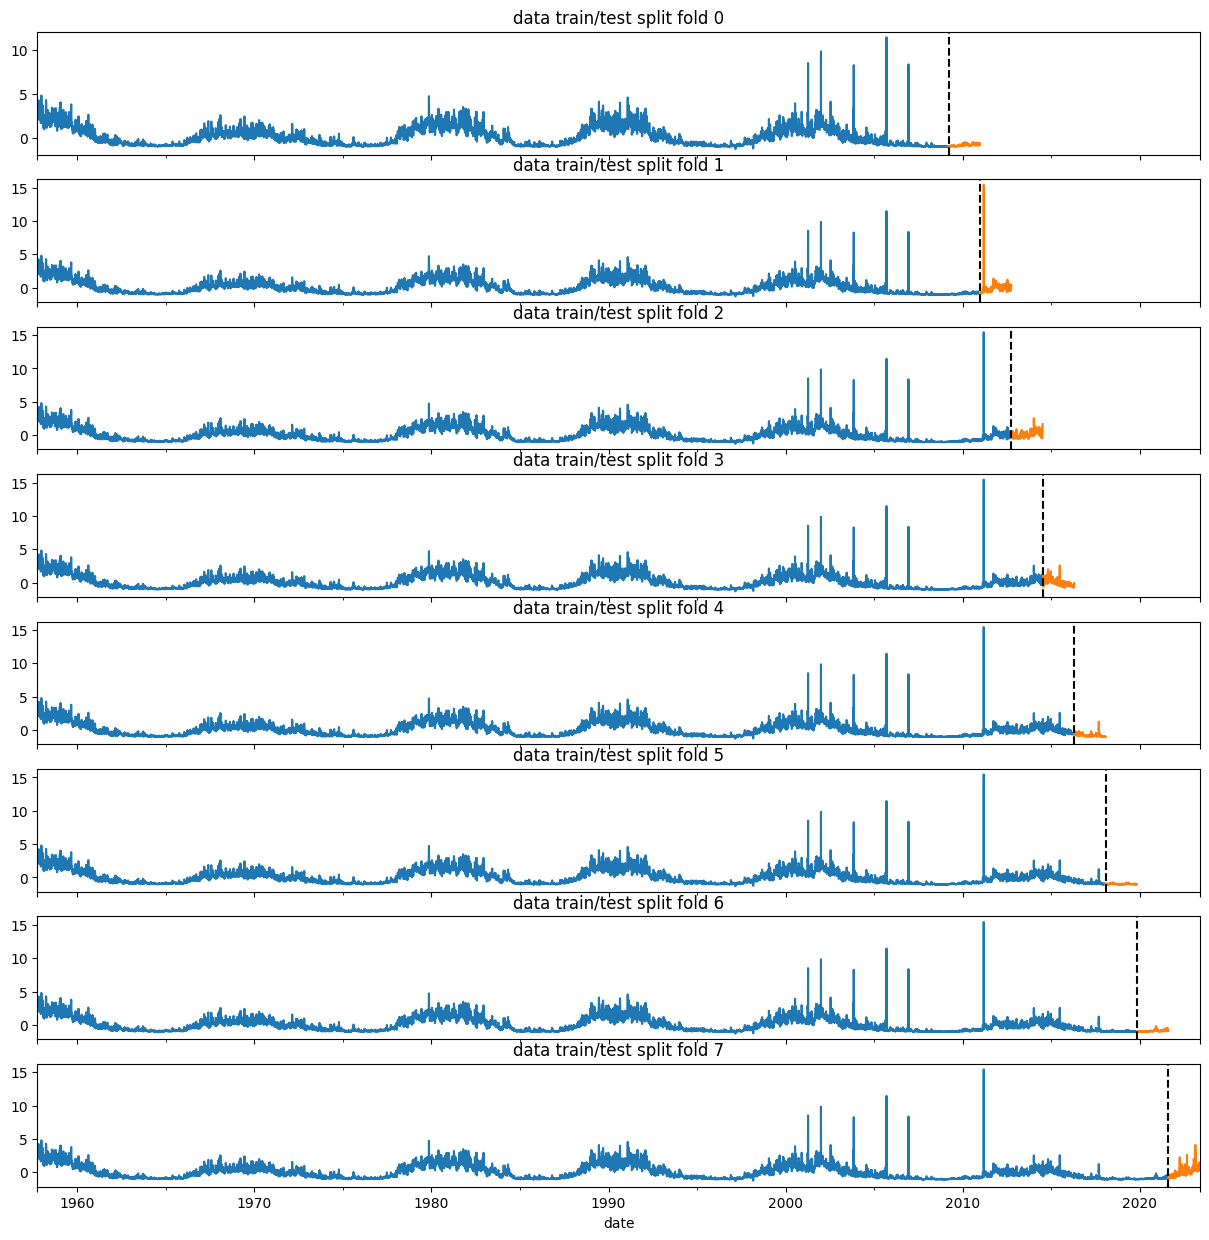

In [25]:
fig, axs=plt.subplots(8, 1, figsize=(15,15),
                           sharex=True)
fold=0
for train_idx, val_idx in tss.split(data):
    train=data.iloc[train_idx]
    test=data.iloc[val_idx]
    train['F10.7'].plot(ax=axs[fold],
                        label='training set',
                        title=f'data train/test split fold {fold}')
    test['F10.7'].plot(ax=axs[fold],
                       label='test set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold +=1
plt.show()    

In [26]:
val_idx

array([23325, 23326, 23327, 23328, 23329, 23330, 23331, 23332, 23333,
       23334, 23335, 23336, 23337, 23338, 23339, 23340, 23341, 23342,
       23343, 23344, 23345, 23346, 23347, 23348, 23349, 23350, 23351,
       23352, 23353, 23354, 23355, 23356, 23357, 23358, 23359, 23360,
       23361, 23362, 23363, 23364, 23365, 23366, 23367, 23368, 23369,
       23370, 23371, 23372, 23373, 23374, 23375, 23376, 23377, 23378,
       23379, 23380, 23381, 23382, 23383, 23384, 23385, 23386, 23387,
       23388, 23389, 23390, 23391, 23392, 23393, 23394, 23395, 23396,
       23397, 23398, 23399, 23400, 23401, 23402, 23403, 23404, 23405,
       23406, 23407, 23408, 23409, 23410, 23411, 23412, 23413, 23414,
       23415, 23416, 23417, 23418, 23419, 23420, 23421, 23422, 23423,
       23424, 23425, 23426, 23427, 23428, 23429, 23430, 23431, 23432,
       23433, 23434, 23435, 23436, 23437, 23438, 23439, 23440, 23441,
       23442, 23443, 23444, 23445, 23446, 23447, 23448, 23449, 23450,
       23451, 23452,

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}


In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [29]:
tscv = TimeSeriesSplit(n_splits=8)


In [30]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()


In [31]:
def create_features(data):
    data=data.copy()
    data['dayofweek']=data.index.dayofweek
    data['quarter']=data.index.quarter
    data['month']=data.index.month
    data['year']=data.index.year
    data['dayofyear']=data.index.dayofyear

    return data
data=create_features(data)



In [32]:
train=create_features(train)
test=create_features(test)

features=['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
target='F10.7'
        

In [33]:
X_train=train[features]
y_train=train[target]

X_test=test[features]
y_test=test[target]
              

In [34]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, imp...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [35]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)


Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score:  1.0220148950201482


Text(0.5, 1.0, 'F10.7cm radio flux by month ')

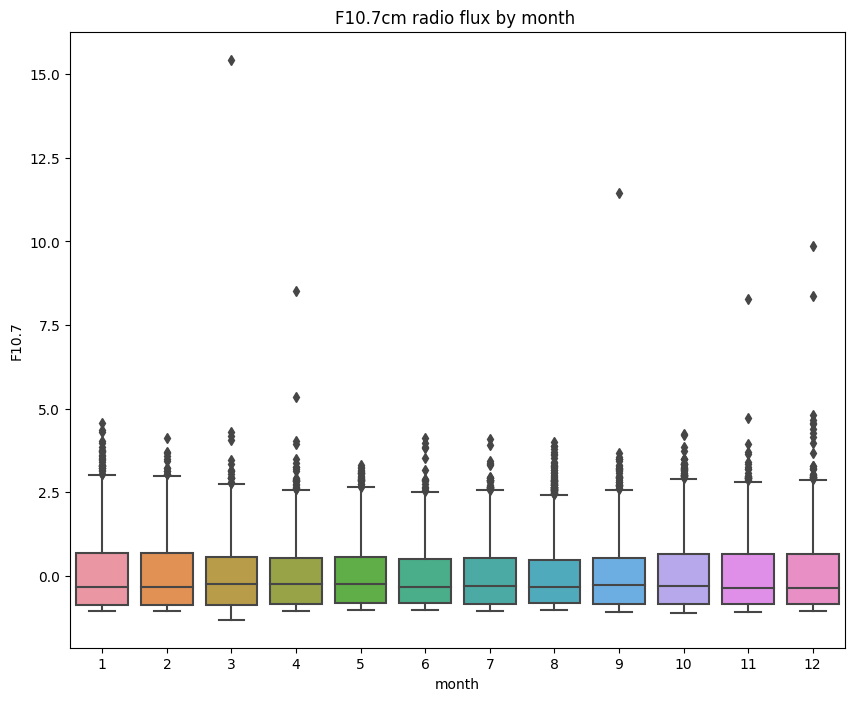

In [36]:
fig, ax=plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='month', y='F10.7')
ax.set_title('F10.7cm radio flux by month ')


Text(0.5, 1.0, 'F10.7cm radio flux by dayofweek ')

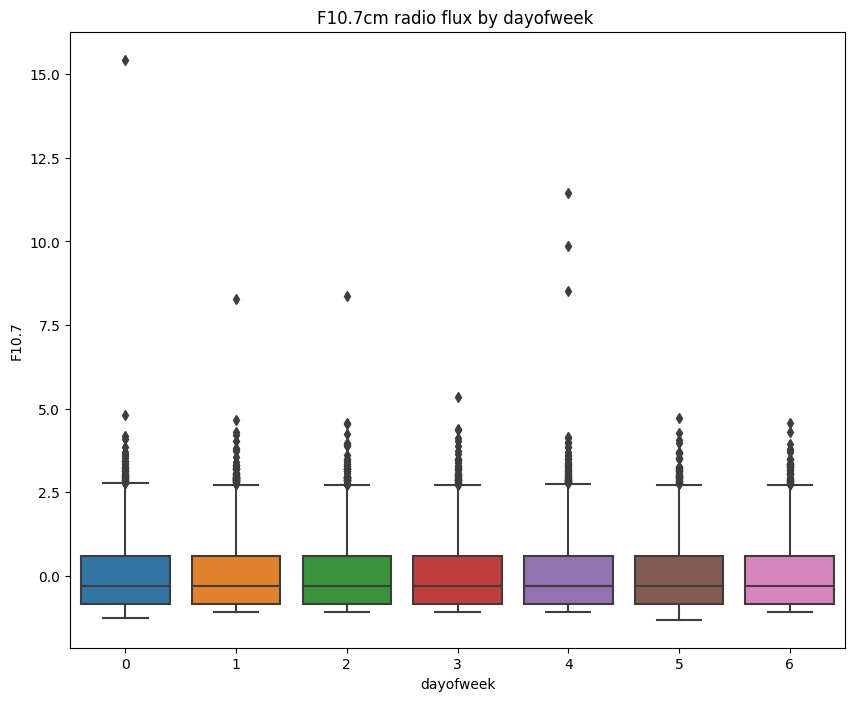

In [37]:
fig, ax=plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='dayofweek', y='F10.7')
ax.set_title('F10.7cm radio flux by dayofweek ')


Text(0.5, 1.0, 'F10.7cm radio flux by quarter ')

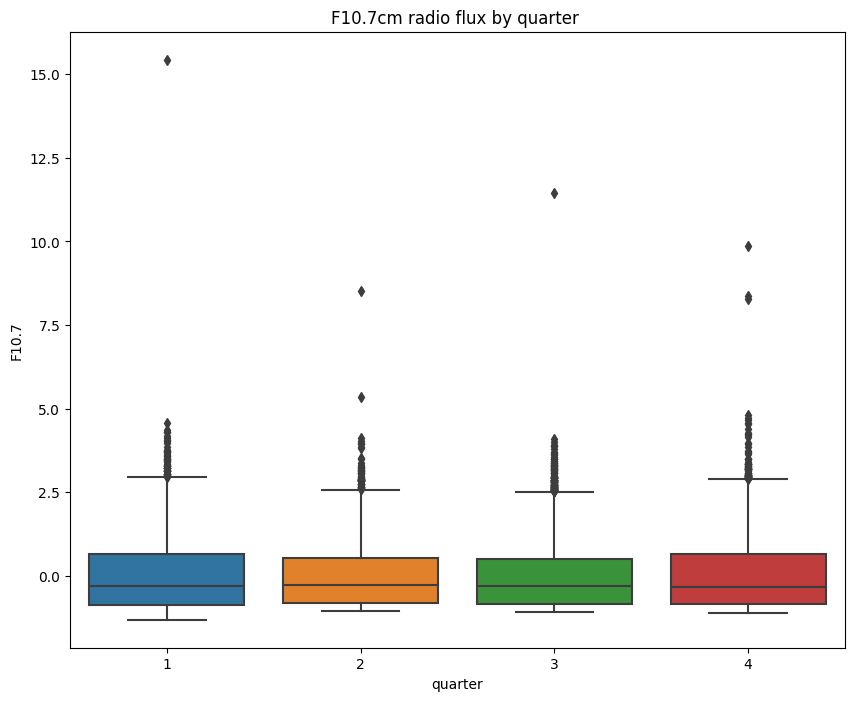

In [38]:
fig, ax=plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='quarter', y='F10.7')
ax.set_title('F10.7cm radio flux by quarter ')


Text(0.5, 1.0, 'F10.7cm radio flux by year ')

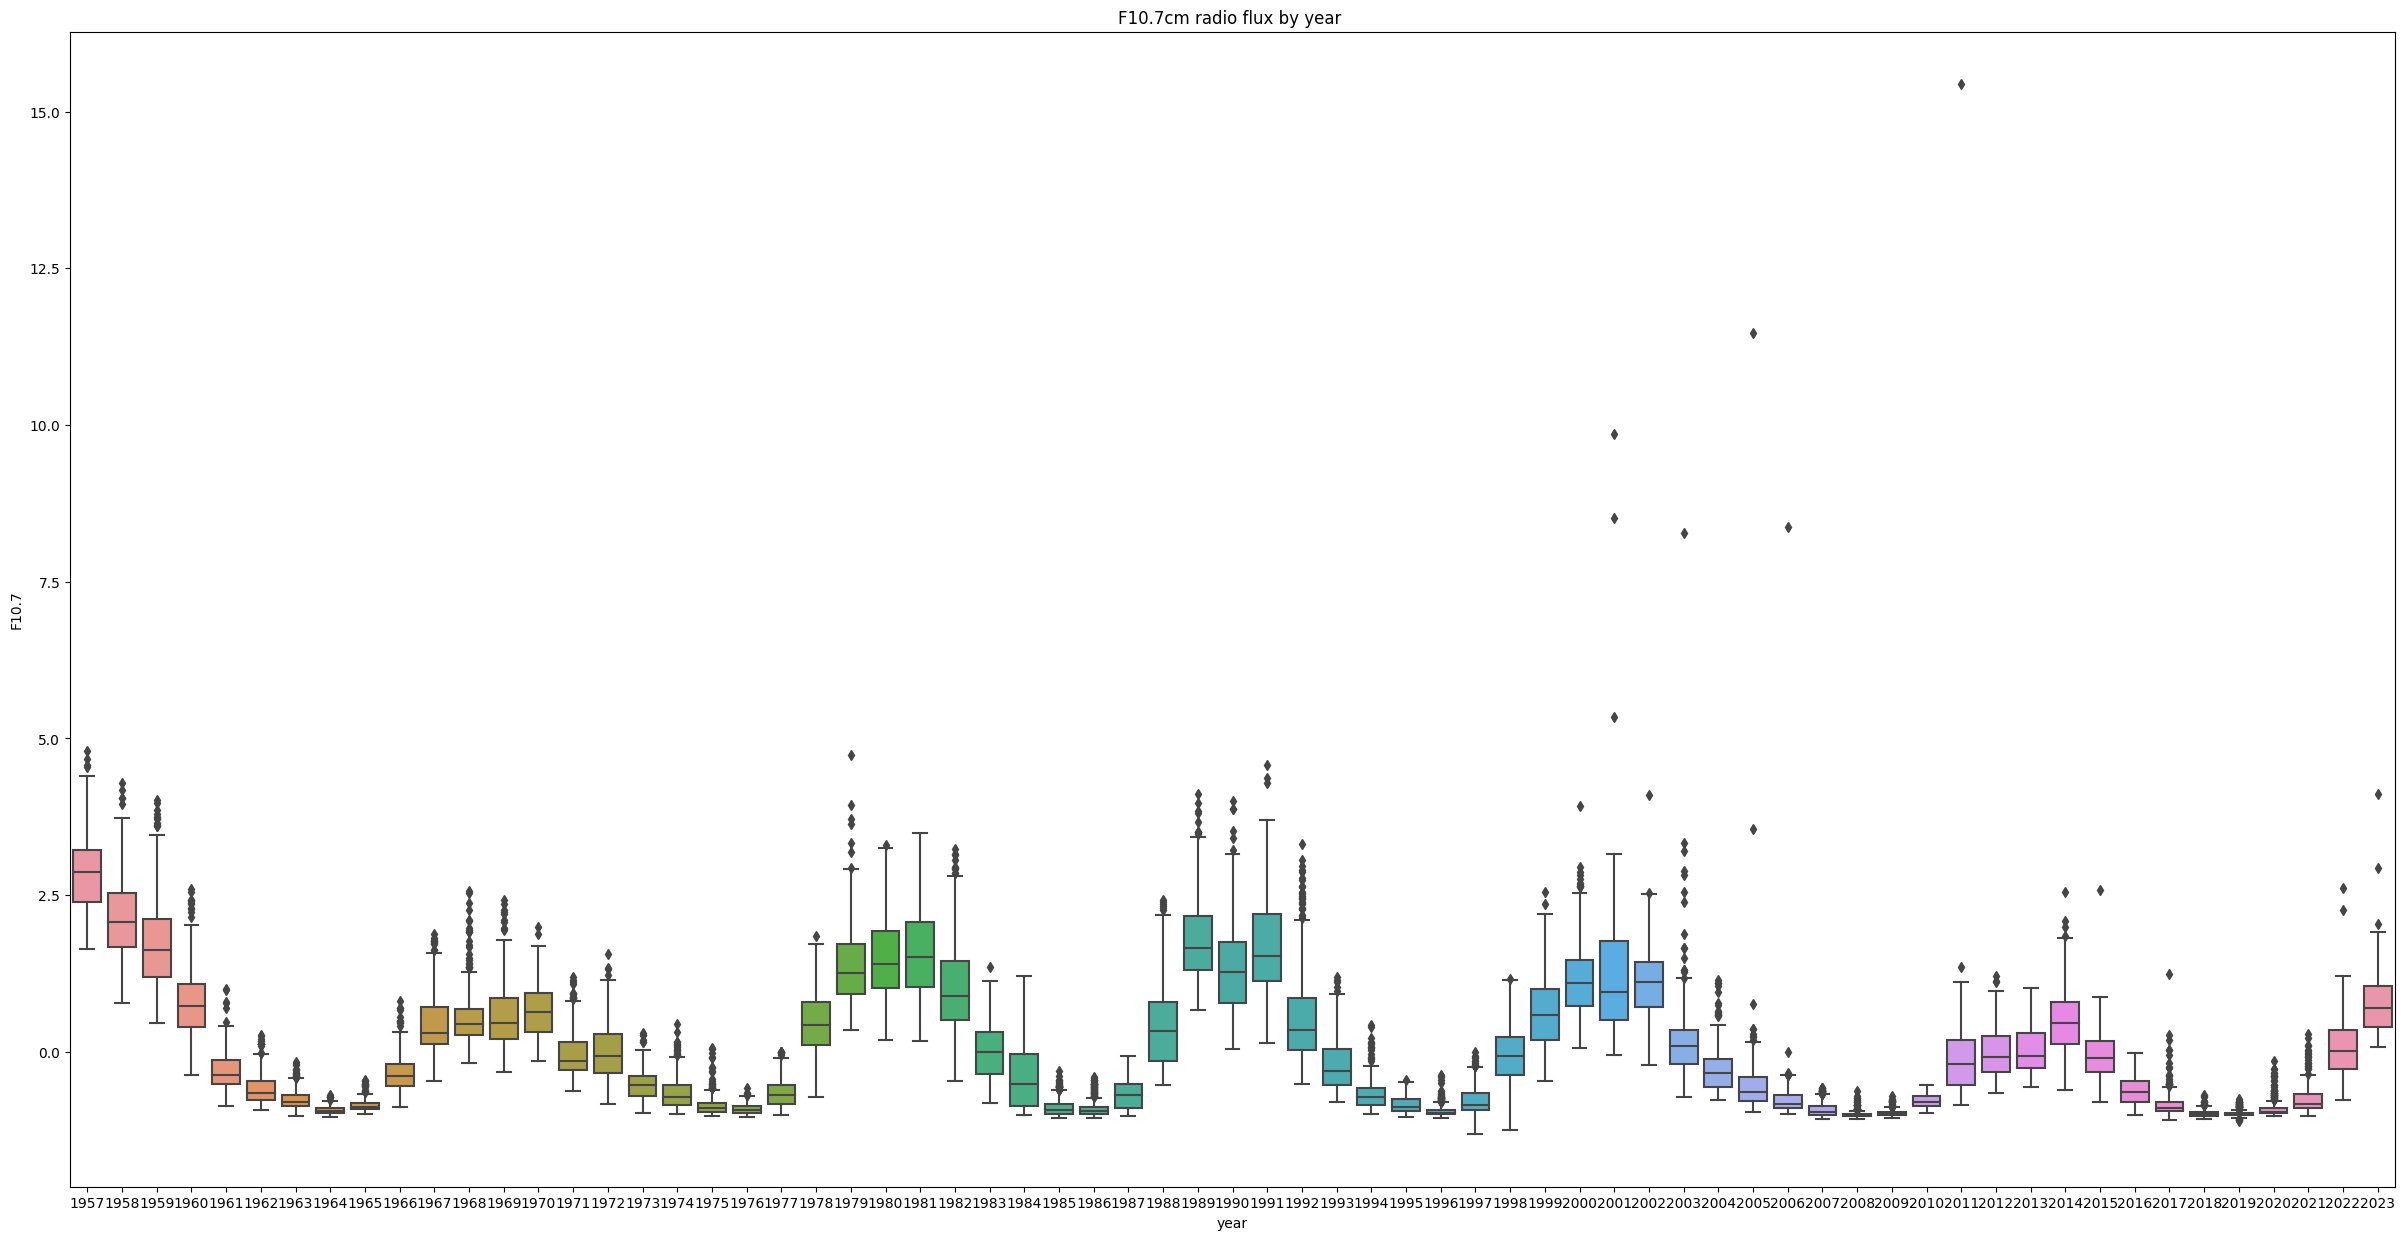

In [39]:
fig, ax=plt.subplots(figsize=(30, 15))
sns.boxplot(data=data, x='year', y='F10.7')
ax.set_title('F10.7cm radio flux by year ')


Text(0.5, 1.0, 'F10.7cm radio flux by dayofyear ')

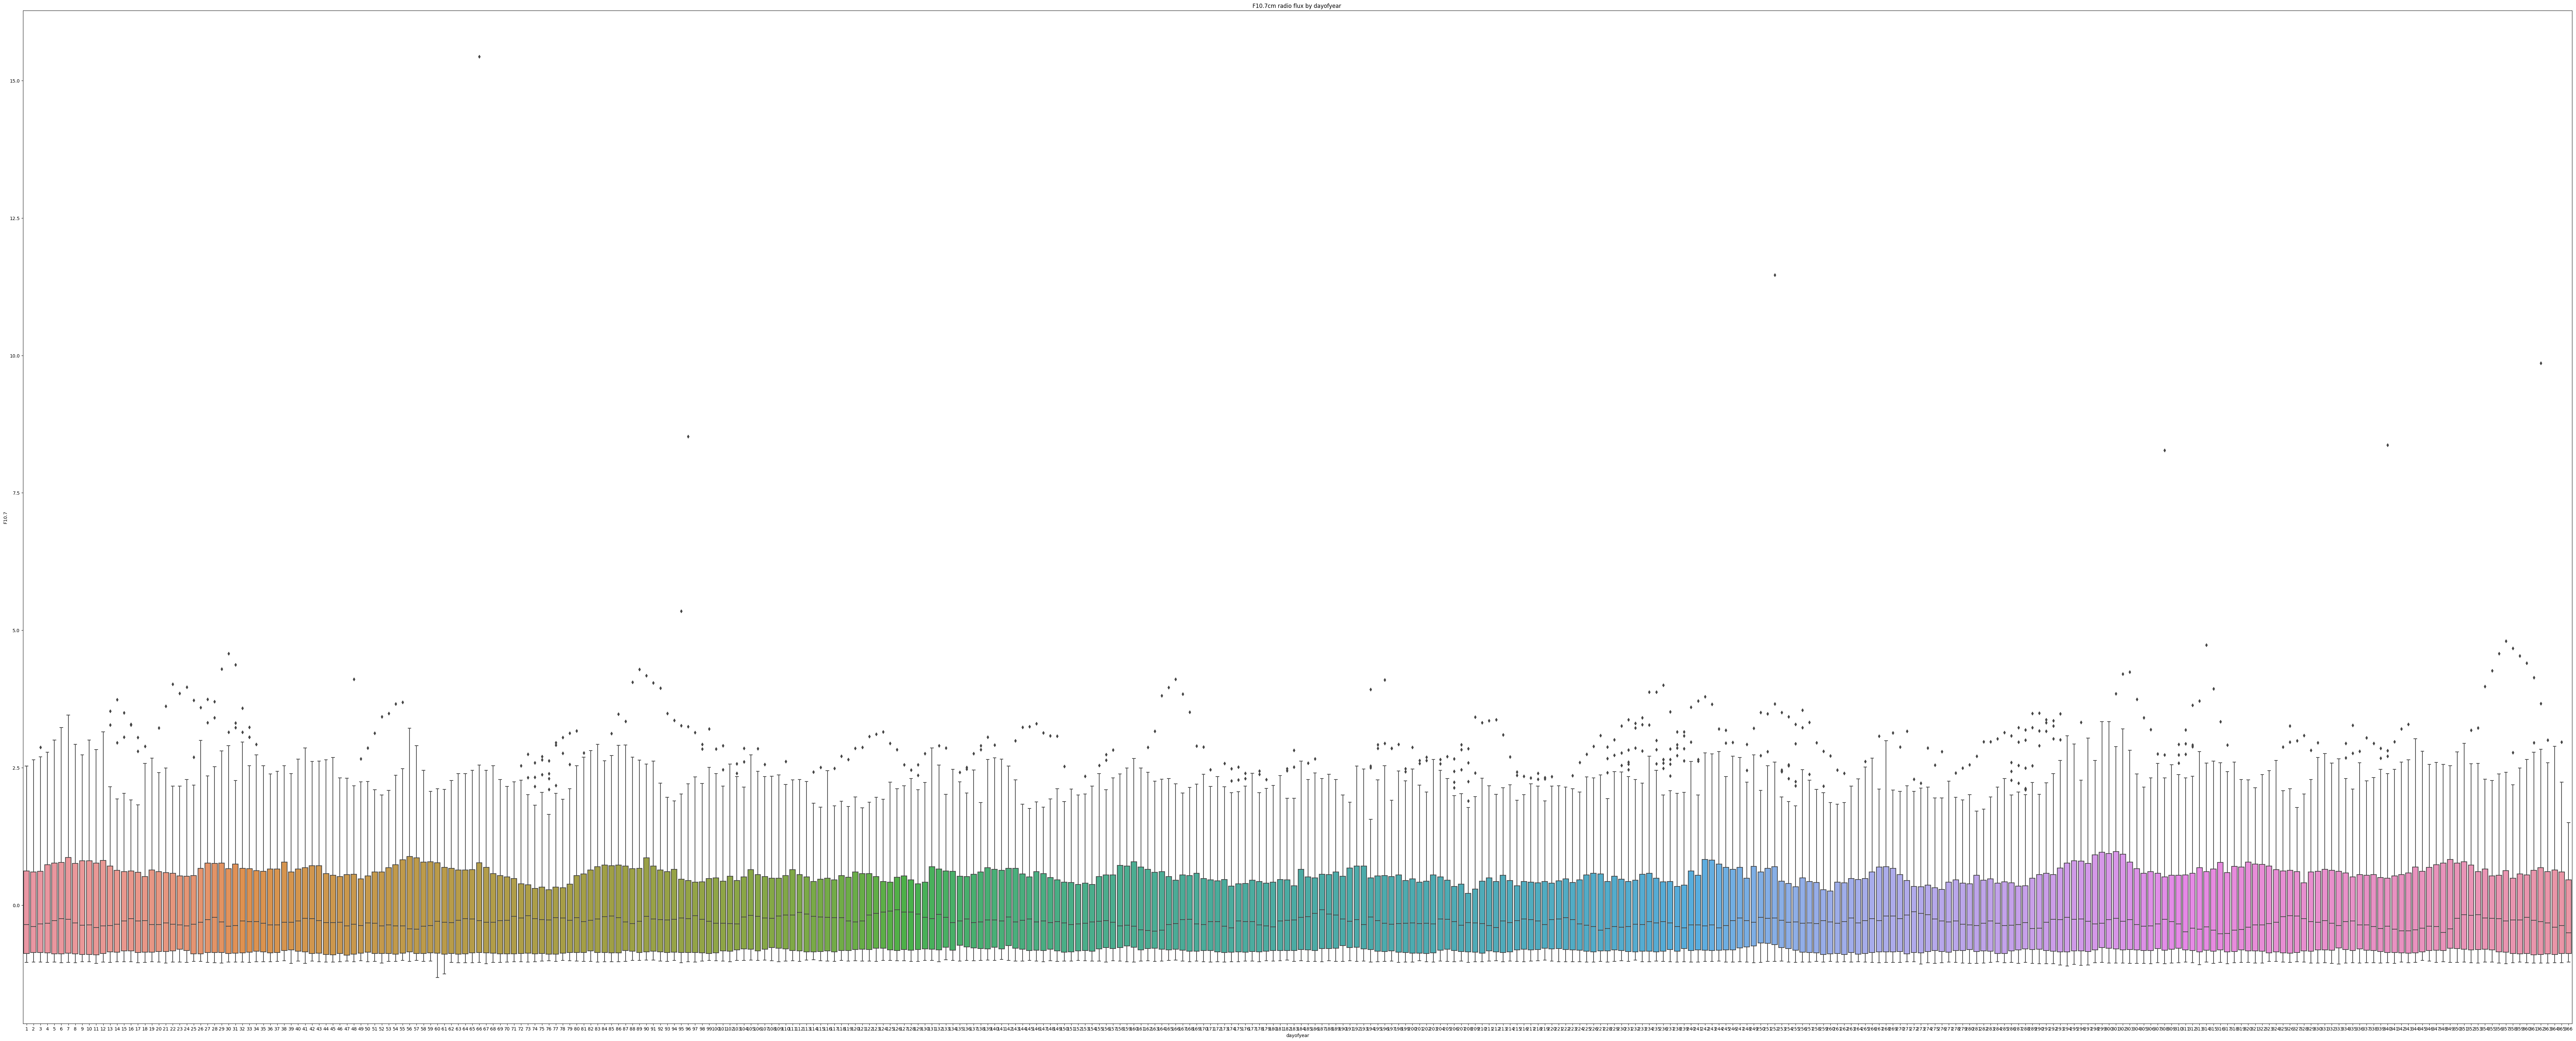

In [40]:
fig, ax=plt.subplots(figsize=(100, 40))
sns.boxplot(data=data, x='dayofyear', y='F10.7')
ax.set_title('F10.7cm radio flux by dayofyear ')


In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [42]:


# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [43]:
reg=xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                     learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)


[0]	validation_0-rmse:1.11796	validation_1-rmse:0.76028


[83]	validation_0-rmse:0.69743	validation_1-rmse:0.74258


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

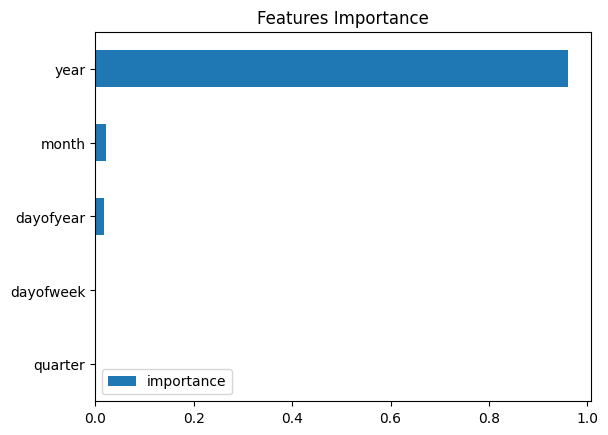

In [44]:
df=pd.DataFrame(data=reg.feature_importances_,
                index=reg.feature_names_in_,
                columns=['importance'])
df.sort_values('importance').plot(kind='barh', title='Features Importance')
plt.show()
                                  

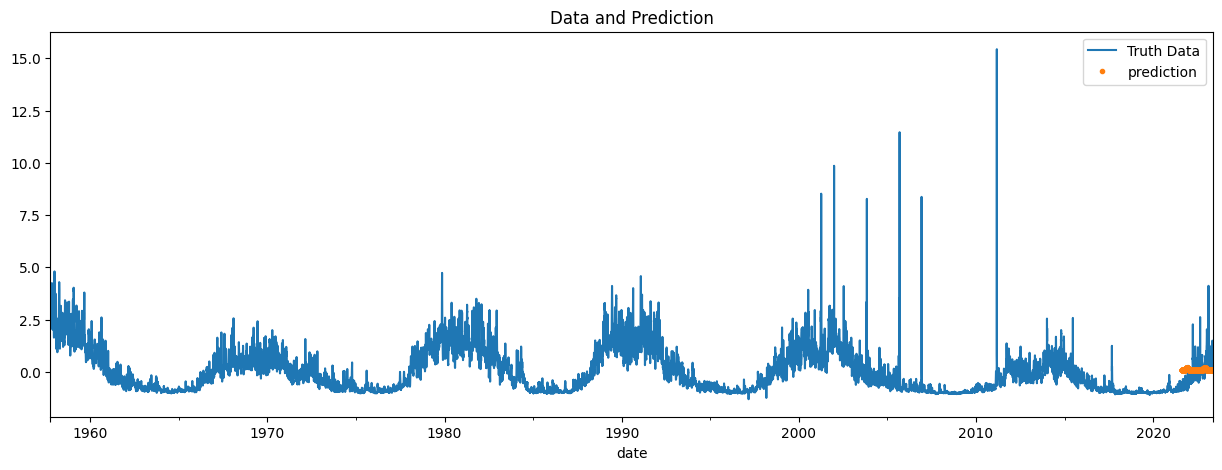

In [43]:
test['prediction']=reg.predict(X_test)
data=data.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax=data[['F10.7']].plot(figsize=(15, 5))
data['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data','prediction'])
ax.set_title('Data and Prediction')
plt.show()

In [45]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

In [46]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [47]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

In [48]:
preds

array([-0.8415459 , -0.8415459 , -0.8415459 , -0.8470513 , -0.8498291 ,
       -0.8449593 , -0.8326153 , -0.82497287, -0.82497287, -0.81359106,
       -0.80861664, -0.80861664, -0.8170469 , -0.8232053 , -0.8161744 ,
       -0.8161744 , -0.8161744 , -0.8102166 , -0.8102166 , -0.8256311 ,
       -0.8231586 , -0.8224179 , -0.78172237, -0.75598043, -0.7615211 ,
       -0.7615211 , -0.7586674 , -0.75619495, -0.75619495, -0.838475  ,
       -0.7848089 , -0.79034954, -0.82116556, -0.83390594, -0.8314335 ,
       -0.86310744, -0.89241946, -0.89241946, -0.8979601 , -0.8979601 ,
       -0.8922681 , -0.88979566, -0.83756757, -0.8289209 , -0.8289209 ,
       -0.74872583, -0.74872583, -0.7456576 , -0.74318516, -0.747614  ,
       -0.747614  , -0.7878578 , -0.82461053, -0.8591607 , -0.85287607,
       -0.8568338 , -0.86241853, -0.86241853, -0.86241853, -0.8679592 ,
       -0.8615864 , -0.85530174, -0.8587913 , -0.8510562 , -0.8510562 ,
       -0.8370888 , -0.80886674, -0.80886674, -0.8051916 , -0.78

In [49]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")


RMSE of the base model: 1.125


In [50]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [51]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
)

[0]	train-rmse:0.89545	validation-rmse:0.64980
[1]	train-rmse:0.74999	validation-rmse:0.70770
[2]	train-rmse:0.65760	validation-rmse:0.80510
[3]	train-rmse:0.57655	validation-rmse:0.89619
[4]	train-rmse:0.53075	validation-rmse:0.95444
[5]	train-rmse:0.50371	validation-rmse:0.97216
[6]	train-rmse:0.47227	validation-rmse:1.01443
[7]	train-rmse:0.45990	validation-rmse:1.02347
[8]	train-rmse:0.44132	validation-rmse:1.04754
[9]	train-rmse:0.43444	validation-rmse:1.05186
[10]	train-rmse:0.42357	validation-rmse:1.06852
[11]	train-rmse:0.41926	validation-rmse:1.08220
[12]	train-rmse:0.41594	validation-rmse:1.08266
[13]	train-rmse:0.40487	validation-rmse:1.09392
[14]	train-rmse:0.39718	validation-rmse:1.10133
[15]	train-rmse:0.39508	validation-rmse:1.10214
[16]	train-rmse:0.38920	validation-rmse:1.10489
[17]	train-rmse:0.38236	validation-rmse:1.10607
[18]	train-rmse:0.38064	validation-rmse:1.10664
[19]	train-rmse:0.37913	validation-rmse:1.11627
[20]	train-rmse:0.37672	validation-rmse:1.11605
[2

[28]	train-rmse:0.34820	validation-rmse:1.12060
[29]	train-rmse:0.34711	validation-rmse:1.12052
[30]	train-rmse:0.34584	validation-rmse:1.12243
[31]	train-rmse:0.34235	validation-rmse:1.12268
[32]	train-rmse:0.34125	validation-rmse:1.12259
[33]	train-rmse:0.34041	validation-rmse:1.12252
[34]	train-rmse:0.33638	validation-rmse:1.12230
[35]	train-rmse:0.33347	validation-rmse:1.12252
[36]	train-rmse:0.32995	validation-rmse:1.12265
[37]	train-rmse:0.32727	validation-rmse:1.12229
[38]	train-rmse:0.32514	validation-rmse:1.12326
[39]	train-rmse:0.32196	validation-rmse:1.12376
[40]	train-rmse:0.32067	validation-rmse:1.12323
[41]	train-rmse:0.31991	validation-rmse:1.12370
[42]	train-rmse:0.31806	validation-rmse:1.12400
[43]	train-rmse:0.31699	validation-rmse:1.12407
[44]	train-rmse:0.31374	validation-rmse:1.12368
[45]	train-rmse:0.31123	validation-rmse:1.12301
[46]	train-rmse:0.31004	validation-rmse:1.12262
[47]	train-rmse:0.30959	validation-rmse:1.12279
[48]	train-rmse:0.30941	validation-rmse:

In [52]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 100

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10 # Every ten rounds
)


[0]	validation-rmse:0.64980	train-rmse:0.89545


[10]	validation-rmse:1.06852	train-rmse:0.42357
[20]	validation-rmse:1.11605	train-rmse:0.37672
[30]	validation-rmse:1.12243	train-rmse:0.34584
[40]	validation-rmse:1.12323	train-rmse:0.32067
[50]	validation-rmse:1.12189	train-rmse:0.30444
[60]	validation-rmse:1.12416	train-rmse:0.29084
[70]	validation-rmse:1.12317	train-rmse:0.27420
[80]	validation-rmse:1.12462	train-rmse:0.25918
[90]	validation-rmse:1.12459	train-rmse:0.24401
[99]	validation-rmse:1.12481	train-rmse:0.23454


In [53]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 5000

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=250
)



[0]	validation-rmse:0.64980	train-rmse:0.89545


[250]	validation-rmse:1.12215	train-rmse:0.14794
[500]	validation-rmse:1.12161	train-rmse:0.09280
[750]	validation-rmse:1.12113	train-rmse:0.06763
[1000]	validation-rmse:1.12064	train-rmse:0.05376
[1250]	validation-rmse:1.12050	train-rmse:0.04500
[1500]	validation-rmse:1.12067	train-rmse:0.03905
[1750]	validation-rmse:1.12060	train-rmse:0.03397
[2000]	validation-rmse:1.12053	train-rmse:0.03018
[2250]	validation-rmse:1.12065	train-rmse:0.02707
[2500]	validation-rmse:1.12061	train-rmse:0.02502
[2750]	validation-rmse:1.12061	train-rmse:0.02502
[3000]	validation-rmse:1.12061	train-rmse:0.02502
[3250]	validation-rmse:1.12061	train-rmse:0.02502
[3500]	validation-rmse:1.12061	train-rmse:0.02502
[3750]	validation-rmse:1.12061	train-rmse:0.02502
[4000]	validation-rmse:1.12061	train-rmse:0.02502
[4250]	validation-rmse:1.12061	train-rmse:0.02502
[4500]	validation-rmse:1.12061	train-rmse:0.02502
[4750]	validation-rmse:1.12061	train-rmse:0.02502
[4999]	validation-rmse:1.12061	train-rmse:0.02502


In [55]:
n = 10000


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=False,
   # Activate early stopping
   early_stopping_rounds=50
)



In [56]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)

In [57]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.895544,0.005151,0.895843,0.020204
1,0.749863,0.005511,0.751627,0.022795
2,0.652716,0.007158,0.654357,0.029447
3,0.585666,0.007685,0.587263,0.036587
4,0.534387,0.009563,0.537559,0.028403


In [59]:
best_rmse = results['test-rmse-mean'].min()

best_rmse


0.2466386072621914

In [ ]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)
preds

array([-0.7196444 , -0.73514247, -0.7539629 , -0.75551486, -0.8016212 ,
       -0.80588865, -0.8015127 , -0.7839489 , -0.79391706, -0.81039536,
       -0.82687306, -0.8312466 , -0.78565216, -0.77730155, -0.81452286,
       -0.8147274 , -0.822827  , -0.7917639 , -0.79264283, -0.83224106,
       -0.78488386, -0.84586847, -0.815946  , -0.8131001 , -0.74616134,
       -0.86099184, -0.8942449 , -0.7578355 , -0.78102577, -0.8424108 ,
       -0.8838575 , -0.82747686, -0.79830754, -0.68221474, -0.7096888 ,
       -0.8389876 , -0.81935966, -0.8140539 , -0.806486  , -0.8129095 ,
       -0.84030473, -0.8404403 , -0.7794249 , -0.7915621 , -0.78184235,
       -0.757161  , -0.7793629 , -0.7580639 , -0.7976415 , -0.7656872 ,
       -0.7801665 , -0.7500192 , -0.79803   , -0.8048334 , -0.7734498 ,
       -0.77351594, -0.8196795 , -0.8137227 , -0.80197597, -0.76431   ,
       -0.76161563, -0.7873033 , -0.7467897 , -0.7468767 , -0.7520051 ,
       -0.75063837, -0.7013111 , -0.75066745, -0.7296585 , -0.73

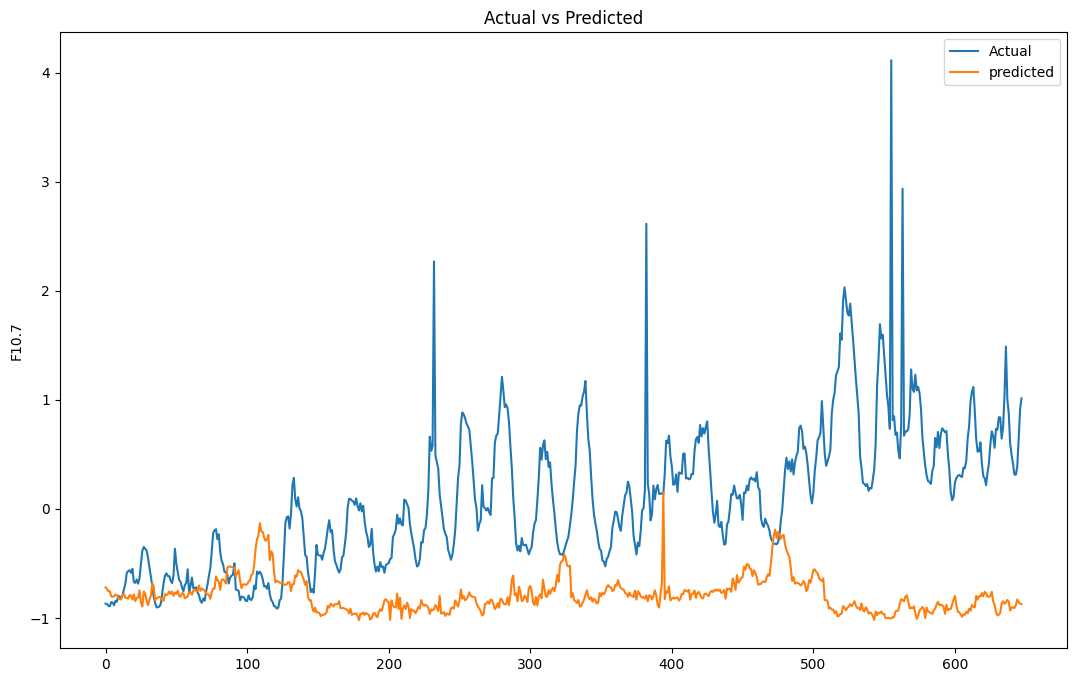

In [ ]:
plt.figure(figsize=(13,8))
plt.plot(list(y_test))
plt.plot(list(preds))
plt.title("Actual vs Predicted")
plt.ylabel("F10.7")
plt.legend(('Actual','predicted'))
plt.show()

In [ ]:
dti = pd.date_range("2023-05-21", periods=20000, freq="H")
df_future_dates = pd.DataFrame(dti, columns = ['Date'])
df_future_dates['F10.7'] = np.nan
df_future_dates.index = pd.to_datetime(df_future_dates['Date'], format='%Y-%m-%d %H:%M:%S')
df_future_dates_copy = df_future_dates.copy()
testX_future, testY_future = create_features(df_future_dates, target_variable='F10.7')

xgb = XGBRegressor(objective= 'reg:linear', n_estimators=1000)
xgb

## Now here I have used train and test from above
xgb.fit(trainX, trainY,
        eval_set=[(trainX, trainY), (testX, testY)],
        early_stopping_rounds=50,
        verbose=False) 

predicted_results_future = xgb.predict(testX_future)

# Graph 
plt.figure(figsize=(13,8))
plt.plot(list(predicted_results_future))
plt.title("Predicted")
plt.ylabel("Irr")
plt.legend(('predicted'))
plt.show()

df_future_dates_copy['Prediction'] = predicted_results_future
Irr_all_future = pd.concat([df2, df_future_dates_copy], sort=False)

# Future Graph 
Overview_Complete_Data_And_Prediction_future = Irr_all_future[['Irr','Prediction']].plot(figsize=(15, 5))


In [ ]:
test['date']=test.index.date

In [60]:

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler




In [62]:
scaled_values = scaler.fit_transform(data)

In [63]:
#train_size = int(len(scaled_values) * 0.8)
#train_data = scaled_values[:train_size]
#test_data = scaled_values[train_size:]


In [86]:
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10  # Number of previous time steps to use as input features
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape the input data to match the LSTM input shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


InvalidIndexError: (slice(0, 10, None), 0)

In [66]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)


Epoch 1/10
19168/19168 - 55s - loss: 0.0477 - 55s/epoch - 3ms/step
Epoch 2/10
19168/19168 - 45s - loss: 0.0391 - 45s/epoch - 2ms/step
Epoch 3/10
19168/19168 - 45s - loss: 0.0387 - 45s/epoch - 2ms/step
Epoch 4/10
19168/19168 - 58s - loss: 0.0382 - 58s/epoch - 3ms/step
Epoch 5/10
19168/19168 - 52s - loss: 0.0379 - 52s/epoch - 3ms/step
Epoch 6/10
19168/19168 - 54s - loss: 0.0382 - 54s/epoch - 3ms/step
Epoch 7/10
19168/19168 - 57s - loss: 0.0378 - 57s/epoch - 3ms/step
Epoch 8/10
19168/19168 - 1584s - loss: 0.0377 - 1584s/epoch - 83ms/step
Epoch 9/10
19168/19168 - 57s - loss: 0.0376 - 57s/epoch - 3ms/step
Epoch 10/10
19168/19168 - 49s - loss: 0.0374 - 49s/epoch - 3ms/step


In [72]:
# Generate predictions for the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scale the predictions


150/150 [==============================] - 1s 3ms/step


In [73]:
# Reshape the test data to match the LSTM input shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [74]:
# Make predictions for the future time steps
future_predictions = model.predict(X_test)


150/150 [==============================] - 1s 4ms/step


In [75]:
# Inverse scale the predictions
future_predictions = scaler.inverse_transform(future_predictions)


ValueError: non-broadcastable output operand with shape (4785,1) doesn't match the broadcast shape (4785,6)

In [76]:
# Calculate the root mean squared error (RMSE) to evaluate the predictions
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, future_predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 0.253022500897683


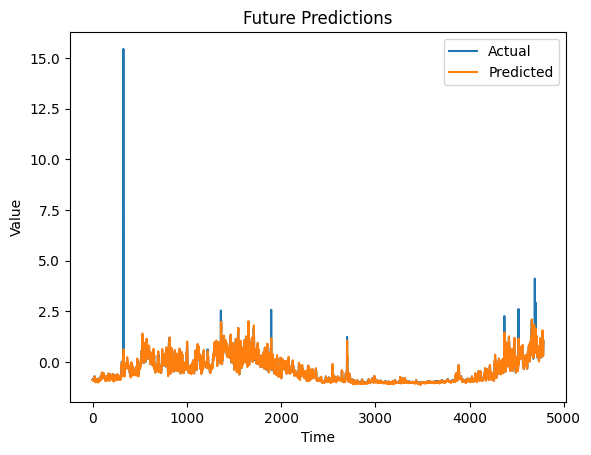

In [77]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(y_test, label='Actual')

# Plot the predicted values
plt.plot(future_predictions, label='Predicted')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Future Predictions')
plt.legend()
plt.show()


In [79]:
# Assuming you have trained your LSTM model and obtained test predictions
predicted_values = test_predictions  # Replace this with your predicted values

# Convert the predicted values to a pandas DataFrame
predicted_data = pd.DataFrame(predicted_values, columns=['Predicted'])

# Add timestamps or index to the DataFrame if you have them
predicted_data['F10.7'] = data['F10.7'].values[train_size+look_back:]

# Store the predicted data to a CSV file
predicted_data.to_csv('predicted_data.csv', index=False)


In [80]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.linalg import pinv



In [81]:
input_size = train_data.shape[1]  # Number of input features
hidden_size = 100  # Number of hidden neurons (adjust as needed)
output_size = 1  # Number of output neurons (assuming regression)

# Randomly initialize the input-to-hidden weight matrix and bias vector
input_weights = np.random.normal(size=(input_size, hidden_size))
biases = np.random.normal(size=(hidden_size,))


In [82]:
hidden_output = np.dot(X_train, input_weights) + biases
hidden_output = np.tanh(hidden_output)  # Apply activation function (e.g., tanh)


ValueError: shapes (19168,10,1) and (6,100) not aligned: 1 (dim 2) != 6 (dim 0)

In [ ]:
def relu(x):
   return np.maximum(x, 0, x)

In [ ]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H


In [ ]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out


In [ ]:
prediction = predict(X_test)
correct = 0
total = X_test.shape[0]
for i in range(total):
    predicted = np.argmax(prediction[i])
    actual = np.argmax(y_test[i])
    correct += 1 if predicted == actual else 0
accuracy = correct/total
print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

ValueError: shapes (4785,10,1) and (10,1000) not aligned: 1 (dim 2) != 10 (dim 0)

In [ ]:
from

ModuleNotFoundError: No module named 'elm'